In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
X = 6*np.random.rand(100,1) - 3
Y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100,1)

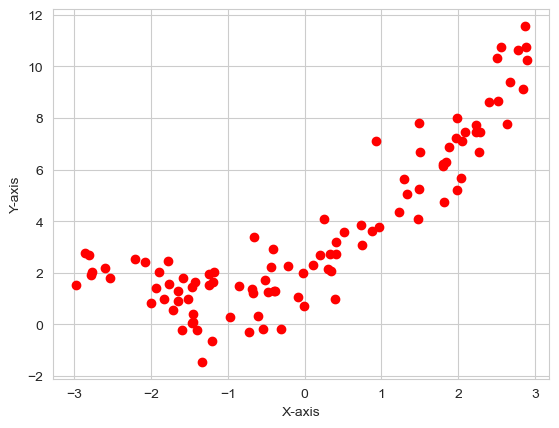

In [3]:
plt.scatter(X,Y , color = 'red')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [6]:
X_train ,X_test ,Y_train ,Y_test = train_test_split(X,Y,test_size =0.2 ,random_state=42)

# Implementing Linear Regression and then Polynomial Regression for comparision

In [8]:
regression = LinearRegression()
regression.fit(X_train,Y_train)

LinearRegression()

In [10]:
score = r2_score(Y_test,regression.predict(X_test))
print('R2 Score : ',score)

R2 Score :  0.7387071981322433


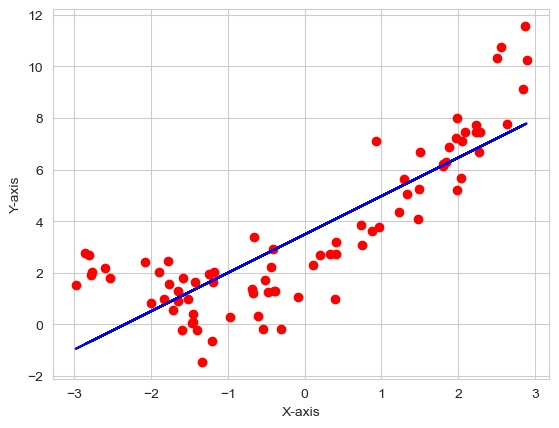

In [12]:
# How the model is working on the training data
plt.scatter(X_train,Y_train , color = 'red')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.plot (X_train , regression.predict(X_train ), color = 'blue')
plt.show()

In [14]:
#Polynomial Transformations
poly = PolynomialFeatures(degree = 2 , include_bias = True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [17]:
# Now we test the regression model
regression = LinearRegression()
regression.fit(X_train_poly,Y_train)
y_predict = regression.predict(X_test_poly)
score = r2_score(Y_test,y_predict)
print('R2 Score : ',score)

R2 Score :  0.9217674594827003


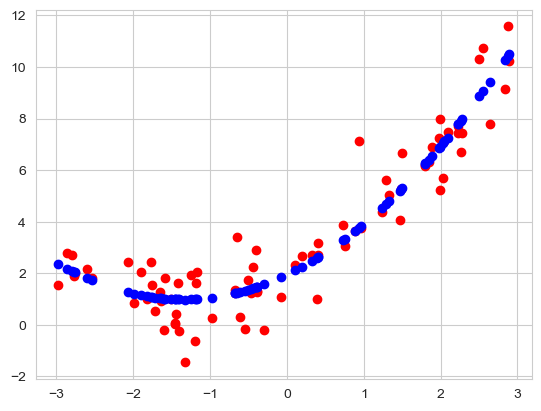

In [20]:
plt.scatter(X_train,Y_train , color = 'red')
plt.scatter(X_train , regression.predict(X_train_poly), color = 'blue')
plt.show()

In [21]:
# What if the degree is 3 
poly_3 = PolynomialFeatures(degree=3 ,include_bias= True)
X_train_poly3 = poly_3.fit_transform(X_train)
X_test_poly3 = poly_3.transform(X_test)


In [22]:
regression_2 = LinearRegression()
regression_2.fit(X_train_poly3,Y_train)
y_predict = regression_2.predict(X_test_poly3)
score = r2_score(Y_test,y_predict)
print('R2 Score : ',score)

R2 Score :  0.9212736777294827


In [41]:
# What if the degree is 4 ? 
poly_4 = PolynomialFeatures(degree=4, include_bias=True)
X_train_poly4 = poly_4.fit_transform(X_train)
X_test_poly4 = poly_4.transform(X_test)

In [42]:
regression_3 = LinearRegression()
regression_3.fit(X_train_poly4 ,Y_train)
y_predict = regression_3.predict(X_test_poly4)
score1 = r2_score(Y_test ,y_predict)
print('R2 Score : ',score1)

R2 Score :  0.9212706818191266


In [43]:
# Prediction for new Data
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly_4.transform(X_new)

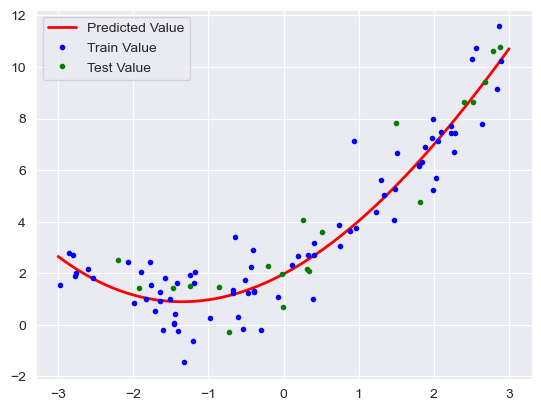

In [44]:
y_predict = regression_3.predict(X_new_poly)
plt.plot(X_new,y_predict,'r-' , linewidth=2 ,label ='Predicted Value')
plt.plot(X_train,Y_train,'b.', linewidth=2 ,label ='Train Value')
plt.plot(X_test,Y_test,'g.', linewidth=2 ,label ='Test Value')
plt.legend(loc='best')
plt.show()